<center><h1>Jayaram_ChaitanyaPriya_HW8</h1></center>
<br>
<br>

<br>
Github Username: chaitanya-priya-kj
<br>
USC ID: 9525343278
<br> Using two of two remaining late days for this assignments

In [351]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import random
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['PYTHONWARNINGS'] = 'ignore'
from sklearn.metrics import roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

### a. Download the Breast Cancer Wisconsin (Diagnostic) Data Set. Download the data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [372]:
path = '../data/wdbc.csv'
df = pd.read_csv(path,header=None)

In [373]:
df = df.rename(columns={0: 'ID',1:'Diagnosis'})
for i in range(2,33):
    df = df.rename(columns={i:'feat'+str(i-1)})

In [374]:
df

,ID,Diagnosis,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [375]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

### i. Supervised Learning

In [31]:
def choosing_penalty_term(clf,X_train,y_train,param_grid):
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train,y_train)
    return grid_search.best_params_

In [121]:
def scores(X, y, y_pred, y_pred_prob):
    label_encoder = LabelEncoder()
    y_true_encoded = label_encoder.fit_transform(y)
    y_pred_encoded = label_encoder.transform(y_pred)

    precision = precision_score(y_true_encoded, y_pred_encoded)
    recall = recall_score(y_true_encoded, y_pred_encoded)
    f1 = f1_score(y_true_encoded, y_pred_encoded)
    auc = roc_auc_score(y_true_encoded, y_pred_prob)

    accuracy = accuracy_score(y, y_pred)

    return {'accuracy': accuracy,'precision': precision,'recall': recall,'f1_score': f1,'auc': auc}


In [382]:
def roc_matrix(y_train,y_train_pred,y_test, y_test_pred):
    
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_train_pred_encoded = label_encoder.transform(y_train_pred)
    
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_test_pred_encoded = label_encoder.transform(y_test_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train_encoded, y_train_pred_encoded, pos_label=1)
    roc_auc_train = roc_auc_score(y_train_encoded, y_train_pred_encoded) 
    plt.plot(fpr_train, tpr_train, label=f'Training ROC Curve (AUC = {roc_auc_train:.2f})')

    fpr_test, tpr_test, _ = roc_curve(y_test_encoded, y_test_pred_encoded,pos_label=1)
    roc_auc_test = roc_auc_score(y_test_encoded, y_test_pred_encoded) 
    plt.plot(fpr_test, tpr_test, label=f'Testing ROC Curve (AUC = {roc_auc_test:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
    print("Training Confusion Matrix:")
    print(train_confusion_matrix)

    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    print("Testing Confusion Matrix:")
    print(test_confusion_matrix)

In [70]:
def supervised_learning(X, y, n):
    X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']
    train_scores = {metric: 0 for metric in metrics}
    test_scores = {metric: 0 for metric in metrics}

    for i in range(1, n + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

        clf = LinearSVC(penalty='l1', dual=False)
        param_grid = {'C': np.logspace(-2, 7, 20)}
        best_params_ = choosing_penalty_term(clf, X_train, y_train, param_grid)

        clf = LinearSVC(penalty='l1', dual=False, C=best_params_['C'])
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)

        print(f"Iteration {i}: Best parameter: {best_params_['C']}")

        y_pred_test_prob = clf.decision_function(X_test)
        y_pred_train_prob = clf.decision_function(X_train)

        scores_test = scores(X_test, y_test, y_pred_test, y_pred_test_prob)
        scores_train = scores(X_train, y_train, y_pred_train, y_pred_train_prob)

        print(f"Training score: {scores_train['accuracy']}\t Testing score: {scores_test['accuracy']}")
        print("------------------------------------------------------------------------------------------")

        for metric in metrics:
            train_scores[metric] += scores_train[metric]
            test_scores[metric] += scores_test[metric]

        if i == n:
            roc_matrix(y_train, y_pred_train, y_test, y_pred_test)

    avg_scores_train = {metric: score / n for metric, score in train_scores.items()}
    avg_scores_test = {metric: score / n for metric, score in test_scores.items()}

    data = [['Metric', 'Training Score', 'Testing Score']]
    data.extend([[metric, avg_scores_train[metric], avg_scores_test[metric]] for metric in metrics])

    print("\n")
    print(tabulate(data, headers="firstrow", floatfmt=".4f"))


Iteration 1: Best parameter: 2.3357214690901213
Training score: 0.9846153846153847	 Testing score: 0.9649122807017544
------------------------------------------------------------------------------------------
Iteration 2: Best parameter: 2.3357214690901213
Training score: 0.9846153846153847	 Testing score: 0.9649122807017544
------------------------------------------------------------------------------------------
Iteration 3: Best parameter: 2.3357214690901213
Training score: 0.9846153846153847	 Testing score: 0.9649122807017544
------------------------------------------------------------------------------------------
Iteration 4: Best parameter: 2.3357214690901213
Training score: 0.9846153846153847	 Testing score: 0.9649122807017544
------------------------------------------------------------------------------------------
Iteration 5: Best parameter: 2.3357214690901213
Training score: 0.9846153846153847	 Testing score: 0.9649122807017544
----------------------------------------------

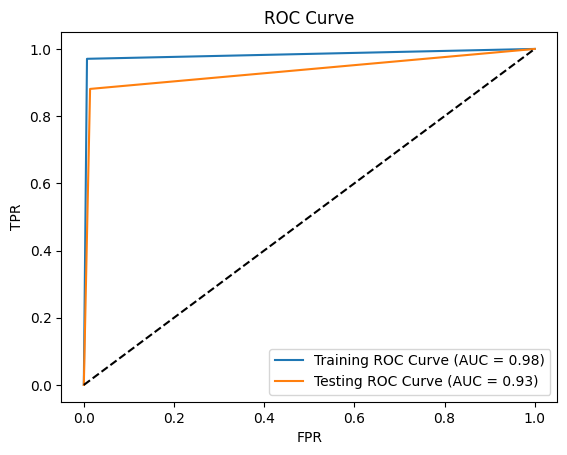

Training Confusion Matrix:
[[283   2]
 [  5 165]]
Testing Confusion Matrix:
[[71  1]
 [ 5 37]]


Metric       Training Score    Testing Score
---------  ----------------  ---------------
accuracy             0.9851           0.9626
precision            0.9890           0.9748
recall               0.9708           0.9222
f1_score             0.9798           0.9478
auc                  0.9980           0.9938


In [94]:
supervised_learning(X,y,30)

## ii. Semi-Supervised Learning/ Self-training

### Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [361]:
def semi_supervised_learning(X, y, n):
    
    X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    
    
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']
    train_scores = {metric: 0 for metric in metrics}
    test_scores = {metric: 0 for metric in metrics}
    
    for i in range(1, n + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
        labeled_X, unlabeled_X, labeled_y, unlabeled_y = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train, random_state=42)
        
        estimator_clf = LinearSVC(penalty='l1', dual=False)
        param_grid = {'C': np.logspace(-2, 7, 10)}
        best_params_ = choosing_penalty_term(estimator_clf, labeled_X, labeled_y, param_grid)
        
        estimator_clf = LinearSVC(penalty='l1', dual=False,C=best_params_['C'])
        
        clf = GridSearchCV(estimator=estimator_clf,param_grid = param_grid)
        clf.fit(labeled_X, labeled_y)
        
        labeled_X, unlabeled_X, labeled_y, unlabeled_y = labeled_X.values.tolist(), unlabeled_X.values.tolist(), labeled_y.values.tolist(), unlabeled_y.values.tolist()
        
        while len(unlabeled_X) > 0:
            values = clf.decision_function(unlabeled_X)
            
            sorted_idx = sorted([i for i in range(len(unlabeled_X))], key=lambda x : abs(values[x]))
            unlabeled_X = [unlabeled_X[i] for i in sorted_idx]
            unlabeled_y = [unlabeled_y[i] for i in sorted_idx]

            labeled_X.append(unlabeled_X.pop())
            labeled_y.append(unlabeled_y.pop())
            clf.best_estimator_.fit(labeled_X, labeled_y)
        
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        
        print(f"Iteration {i}: Best parameter: {best_params_['C']}")
        
        y_pred_test_prob = clf.decision_function(X_test)
        y_pred_train_prob = clf.decision_function(X_train)
        scores_test = scores(X_test, y_test, pd.Series(y_pred_test), pd.Series(y_pred_test_prob))
        scores_train = scores(X_train, y_train, y_pred_train, y_pred_train_prob)
        
        print(f"Training score: {scores_train['accuracy']}\t Testing score: {scores_test['accuracy']}")
        print("------------------------------------------------------------------------------------------")
        
        for metric in metrics:
            train_scores[metric] += scores_train[metric]
            test_scores[metric] += scores_test[metric]

        if i == n:
            roc_matrix(y_train, y_pred_train, y_test, y_pred_test)

    avg_scores_train = {metric: score / n for metric, score in train_scores.items()}
    avg_scores_test = {metric: score / n for metric, score in test_scores.items()}

    data = [['Metric', 'Training Score', 'Testing Score']]
    data.extend([[metric, avg_scores_train[metric], avg_scores_test[metric]] for metric in metrics])

    print(tabulate(data, headers="firstrow", floatfmt=".4f"))

Iteration 1: Best parameter: 1000.0
Training score: 0.9534518640332643	 Testing score: 0.9237401531294258
------------------------------------------------------------------------------------------
Iteration 2: Best parameter: 10000000.0
Training score: 0.949906482023611	 Testing score: 0.9307414815417648
------------------------------------------------------------------------------------------
Iteration 3: Best parameter: 100000.0
Training score: 0.9426513312388297	 Testing score: 0.9280625941344803
------------------------------------------------------------------------------------------
Iteration 4: Best parameter: 1000.0
Training score: 0.9491096791442075	 Testing score: 0.9291133578241747
------------------------------------------------------------------------------------------
Iteration 5: Best parameter: 10000.0
Training score: 0.9531561483520222	 Testing score: 0.9300768103724637
------------------------------------------------------------------------------------------
Iteration

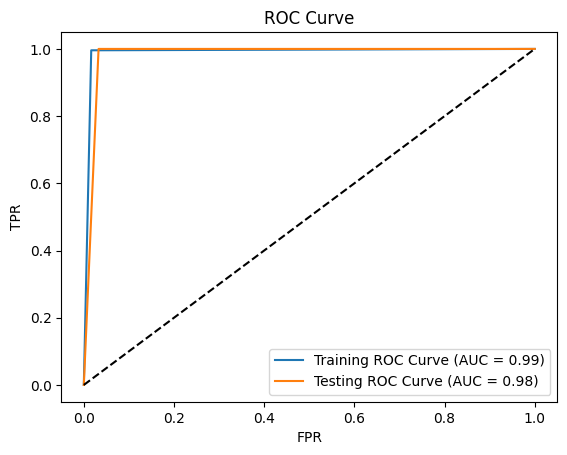

Training Confusion Matrix:
[[599  10]
 [  2 486]]
Testing Confusion Matrix:
[[148   5]
 [  0 122]]
Metric       Training Score    Testing Score
---------  ----------------  ---------------
accuracy             0.9487           0.9261
precision            0.9798           0.9606
recall               0.9959           1.0000
f1_score             0.9878           0.9799
auc                  0.9998           1.0000


In [362]:
semi_supervised_learning(X, y, 30)

## iii. Unsupervised Learning

To make sure that the algorithm was not trapped in a local minimum, increase the likelihood of finding the global minimum. For this the number of iterations and the number of clusters are important parameters to be set so that it is not trapped in local minimum. 

In [383]:
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

def kmeans_unsupervised_learning(X, y, n):
    
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']
    train_scores = {metric: 0 for metric in metrics}
    test_scores = {metric: 0 for metric in metrics}
    X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    for i in range(1, n + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#         X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

        kmeans = KMeans(n_clusters=2, n_init = 15, random_state=42).fit(X_train)
        train_label = kmeans.predict(X_train)
        
        dist = np.ndarray((X_train.shape[0],))
        y_pred_train_prob = np.ndarray((X_train.shape[0], 2))
        cluster_centers = kmeans.cluster_centers_
        for idx, x in enumerate(X_train.values):
            center = cluster_centers[train_label[idx]]
            dist[idx] = np.linalg.norm(x - center)
            y_pred_train_prob[idx, 0] = np.linalg.norm(x - cluster_centers[0])
            y_pred_train_prob[idx, 1] = np.linalg.norm(x - cluster_centers[1])

        y_pred_train_prob = softmax(y_pred_train_prob, axis=1).astype(np.float64)
        
        label_2_cluster = np.ndarray((2,), dtype='int')
        y_pred_train = train_label.copy()
        
        for c in [0, 1]:
            idx, = np.where(train_label == c)
            top_30 = sorted(idx.tolist(), key=lambda i : dist[i])[:30]
            m = y_train.iloc[top_30].value_counts().index[0]
            y_pred_train[idx] = m
            label_2_cluster[m] = c
        
        pos_cluster = label_2_cluster[0]
        
        y_pred_train_prob = y_pred_train_prob[:, pos_cluster]
                                
        test_label = kmeans.predict(X_test)
        
        dist = np.ndarray((X_test.shape[0],))
        y_pred_test_prob = np.ndarray((X_test.shape[0], 2))
        
        for idx, x in enumerate(X_test.values):
            center = kmeans.cluster_centers_[test_label[idx]]
            
            dist[idx] = np.linalg.norm(x - center)
            y_pred_test_prob[idx, 0] = np.linalg.norm(x - kmeans.cluster_centers_[0])
            y_pred_test_prob[idx, 1] = np.linalg.norm(x - kmeans.cluster_centers_[1])

        y_pred_test_prob = softmax(y_pred_test_prob, axis=1).astype(np.float64)
        
        label_2_cluster = np.ndarray((2,), dtype='int')
        y_pred_test = test_label.copy()
        
        for c in [0, 1]:
            idx, = np.where(test_label == c)
            top_30 = sorted(idx.tolist(), key=lambda i : dist[i])[:30]
            
            m = y_test.iloc[top_30].value_counts().index[0]
            y_pred_test[idx] = m
            label_2_cluster[m] = c
        

        pos_cluster = label_2_cluster[0]
        
        y_pred_test_prob = y_pred_test_prob[:, pos_cluster]
        
        
        scores_test = scores(X_test, y_test, pd.Series(y_pred_test), pd.Series(y_pred_test_prob))
        scores_train = scores(X_train, y_train, y_pred_train, y_pred_train_prob)
        print(f"Iteration: {i}")
        print(f"Training score: {scores_train['accuracy']}\t Testing score: {scores_test['accuracy']}")
        print("------------------------------------------------------------------------------------------")
        for metric in metrics:
            train_scores[metric] += scores_train[metric]
            test_scores[metric] += scores_test[metric]

        if i == n:
            roc_matrix(y_train, y_pred_train, y_test, y_pred_test)

    avg_scores_train = {metric: score / n for metric, score in train_scores.items()}
    avg_scores_test = {metric: score / n for metric, score in test_scores.items()}

    data = [['Metric', 'Training Score', 'Testing Score']]
    data.extend([[metric, avg_scores_train[metric], avg_scores_test[metric]] for metric in metrics])

    print(tabulate(data, headers="firstrow", floatfmt=".4f"))
    

Iteration: 1
Training score: 0.8940615694784235	 Testing score: 0.889071753555352
------------------------------------------------------------------------------------------
Iteration: 2
Training score: 0.8950410885252365	 Testing score: 0.8847844993372863
------------------------------------------------------------------------------------------
Iteration: 3
Training score: 0.8912134745581575	 Testing score: 0.8868999940775143
------------------------------------------------------------------------------------------
Iteration: 4
Training score: 0.8947029996890097	 Testing score: 0.8871139406627245
------------------------------------------------------------------------------------------
Iteration: 5
Training score: 0.8917880428272801	 Testing score: 0.8861383449987348
------------------------------------------------------------------------------------------
Iteration: 6
Training score: 0.8913176284450327	 Testing score: 0.8841859194872758
------------------------------------------------

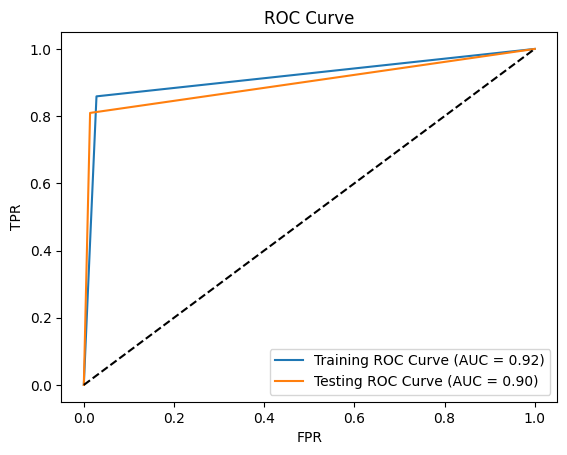

Training Confusion Matrix:
[[277   8]
 [ 24 146]]
Testing Confusion Matrix:
[[71  1]
 [ 8 34]]
Metric       Training Score    Testing Score
---------  ----------------  ---------------
accuracy             0.8938           0.8858
precision            0.9481           0.9714
recall               0.8588           0.8095
f1_score             0.9012           0.8831
auc                  0.9785           0.9881


In [384]:
kmeans_unsupervised_learning(X, y.replace({"B":0,"M":1}), 30)

## iv. Spectral Clustering

In [385]:
def spectral_unsupervised_learning(X, y, n):
    
    metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'auc']
    train_scores = {metric: 0 for metric in metrics}
    test_scores = {metric: 0 for metric in metrics}
    X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
    for i in range(1, n + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
        
        cluster_label = SpectralClustering(n_clusters=2, 
                                           assign_labels='kmeans', 
                                           affinity='rbf', 
                                           eigen_tol = 1e-2, 
                                           eigen_solver = 'arpack', 
                                           random_state=0).fit_predict(X_train)
        cluster_centers = []
        for c in [0,1]:
            cluster_centers.append(np.mean(X_train[cluster_label==c], axis = 0).tolist())

        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(X_train, cluster_label)
        train_label = knn.predict(X_train)
        dist = np.ndarray((X_train.shape[0],))
        y_pred_train_prob = np.ndarray((X_train.shape[0], 2))
        for idx, x in enumerate(X_train.values):
            center = cluster_centers[train_label[idx]]
            dist[idx] = np.linalg.norm(x - center)
            y_pred_train_prob[idx, 0] = np.linalg.norm(x - cluster_centers[0])
            y_pred_train_prob[idx, 1] = np.linalg.norm(x - cluster_centers[1])

        y_pred_train_prob = softmax(y_pred_train_prob, axis=1).astype(np.float64)
        
        label_2_cluster = np.ndarray((2,), dtype='int')
        y_pred_train = train_label.copy()
        
        for c in [0, 1]:
            idx, = np.where(train_label == c)
            top_30 = sorted(idx.tolist(), key=lambda i : dist[i])[:30]
            m = y_train.iloc[top_30].value_counts().index[0]
            y_pred_train[idx] = m
            label_2_cluster[m] = c
        

        pos_cluster = label_2_cluster[0]
        
        y_pred_train_prob = y_pred_train_prob[:, pos_cluster]
                                
            
            
#         test_label = kmeans.predict(X_test)
        test_label = knn.predict(X_test)
        dist = np.ndarray((X_test.shape[0],))
        y_pred_test_prob = np.ndarray((X_test.shape[0], 2))
        
        for idx, x in enumerate(X_test.values):
            center = cluster_centers[test_label[idx]]
            
            dist[idx] = np.linalg.norm(x - center)
            y_pred_test_prob[idx, 0] = np.linalg.norm(x - cluster_centers[0])
            y_pred_test_prob[idx, 1] = np.linalg.norm(x - cluster_centers[1])

        y_pred_test_prob = softmax(y_pred_test_prob, axis=1).astype(np.float64)
        
        label_2_cluster = np.ndarray((2,), dtype='int')
        y_pred_test = test_label.copy()
        
        for c in [0, 1]:
            idx, = np.where(test_label == c)
            top_30 = sorted(idx.tolist(), key=lambda c : dist[c])[:30]
            
            m = y_test.iloc[top_30].value_counts().index[0]
            y_pred_test[idx] = m
            label_2_cluster[m] = c
        

        pos_cluster = label_2_cluster[0]
        
        y_pred_test_prob = y_pred_test_prob[:, pos_cluster]
        
        
        scores_test = scores(X_test, y_test, pd.Series(y_pred_test), pd.Series(y_pred_test_prob))
        scores_train = scores(X_train, y_train, y_pred_train, y_pred_train_prob)
        print(f"Iteration: {i}")
        print(f"Training score: {scores_train['accuracy']}\t Testing score: {scores_test['accuracy']}")
        print("------------------------------------------------------------------------------------------")
        for metric in metrics:
            train_scores[metric] += scores_train[metric]
            test_scores[metric] += scores_test[metric]

        if i == n:
            roc_matrix(y_train, y_pred_train, y_test, y_pred_test)

    avg_scores_train = {metric: score / n for metric, score in train_scores.items()}
    avg_scores_test = {metric: score / n for metric, score in test_scores.items()}

    data = [['Metric', 'Training Score', 'Testing Score']]
    data.extend([[metric, avg_scores_train[metric], avg_scores_test[metric]] for metric in metrics])

    print(tabulate(data, headers="firstrow", floatfmt=".4f"))
    

Iteration: 1
Training score: 0.8863621964890988	 Testing score: 0.8666200655923699
------------------------------------------------------------------------------------------
Iteration: 2
Training score: 0.8869482504374743	 Testing score: 0.8703413216015996
------------------------------------------------------------------------------------------
Iteration: 3
Training score: 0.8878388815944036	 Testing score: 0.8726837743499614
------------------------------------------------------------------------------------------
Iteration: 4
Training score: 0.8787034051857969	 Testing score: 0.8703618247607475
------------------------------------------------------------------------------------------
Iteration: 5
Training score: 0.8865978673501269	 Testing score: 0.8689875427088292
------------------------------------------------------------------------------------------
Iteration: 6
Training score: 0.8796060835796282	 Testing score: 0.8698088766455417
-----------------------------------------------

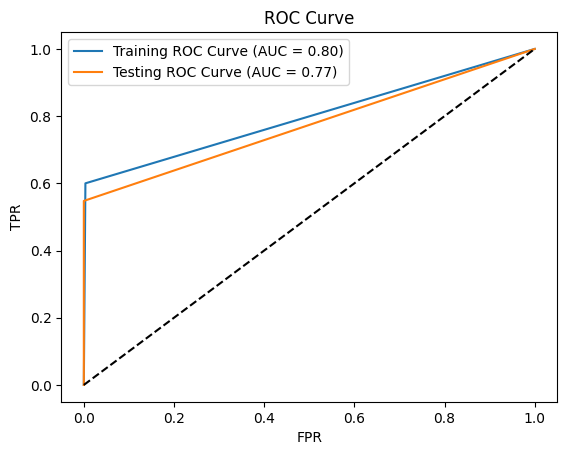

Training Confusion Matrix:
[[284   1]
 [ 68 102]]
Testing Confusion Matrix:
[[72  0]
 [19 23]]
Metric       Training Score    Testing Score
---------  ----------------  ---------------
accuracy             0.8839           0.8691
precision            0.9903           1.0000
recall               0.6000           0.5476
f1_score             0.7473           0.7077
auc                  0.9785           0.9868


In [386]:
spectral_unsupervised_learning(X, y.replace({"B":0,"M":1}), 30)

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

The supervised learning ofcourse performs better because it already has label information and can learn from it. Semi supervised having lesser information from this has lesser accuracy than supervised learning but greater than unsupervised. Unsupervised learning performs poorly because it has no information to learn from. 

## 2. Active Learning Using Support Vector Machines

### a) Download the banknote authentication Data Set. Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [387]:
path = '../data/data_banknote_authentication.txt'
data = pd.read_csv(path,header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

n = 50

### b) i Passive Learning

In [349]:
param_grid = {'C' : np.logspace(-2, 7, 20)}

alpha = np.logspace(-2, 7, 20)

clf_estimator = LinearSVC(penalty='l1', dual=False)
                     
passive_test_error = []

for i in range(n):
    
    i_values = np.arange(X_train.shape[0])
    
    viewed_i = []
    temp_acc = []
    while len(i_values) > 0:
        np.random.shuffle(i_values)
        pool, i_values = i_values[:10], i_values[10:]
#         print(viewed_i + pool)
        viewed_i.extend(pool)
        
        viewed_X, viewed_Y = X_train.iloc[viewed_i], y_train.iloc[viewed_i]
        
        clf = GridSearchCV(estimator=clf_estimator, param_grid=param_grid, cv=5)
        clf.fit(viewed_X, viewed_Y)
        y_pred = clf.predict(X_test)
        
        temp_acc.append(accuracy_score(y_test,y_pred))
    
    passive_test_error.append(1-np.mean(temp_acc))
    print(f"Iterations: {i} | Test accuracy: {np.mean(temp_acc)}")
        

Iterations: 0 | Test accuracy: 0.9881120527306968
Iterations: 1 | Test accuracy: 0.9870762711864407
Iterations: 2 | Test accuracy: 0.9832627118644066
Iterations: 3 | Test accuracy: 0.985852165725047
Iterations: 4 | Test accuracy: 0.985075329566855
Iterations: 5 | Test accuracy: 0.987382297551789
Iterations: 6 | Test accuracy: 0.98189736346516
Iterations: 7 | Test accuracy: 0.983168549905838
Iterations: 8 | Test accuracy: 0.9861581920903956
Iterations: 9 | Test accuracy: 0.9843926553672315
Iterations: 10 | Test accuracy: 0.985852165725047
Iterations: 11 | Test accuracy: 0.9850753295668551
Iterations: 12 | Test accuracy: 0.9885122410546138
Iterations: 13 | Test accuracy: 0.983145009416196
Iterations: 14 | Test accuracy: 0.9842514124293785
Iterations: 15 | Test accuracy: 0.9879708097928437
Iterations: 16 | Test accuracy: 0.9863465160075328
Iterations: 17 | Test accuracy: 0.984580979284369
Iterations: 18 | Test accuracy: 0.9825564971751413
Iterations: 19 | Test accuracy: 0.9864877589453859

### b) ii Active Learning

In [397]:
param_grid = {'C' : np.logspace(-2, 7, 20)}

alpha = np.logspace(-2, 7, 20)

clf_estimator = LinearSVC(penalty='l1', dual=False)
                     
active_test_error = []

for i in range(n):
    i_values = np.arange(X_train.shape[0])
    
    viewed_i = []
    

    np.random.shuffle(i_values)
    pool, i_values = i_values[:10], i_values[10:]
    viewed_i.extend(pool)
    temp_acc = []
    while len(viewed_i) <= 900:
        viewed_x, viewed_y = X_train.iloc[viewed_i], y_train.iloc[viewed_i]

        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), param_grid=param_grid, cv=5)
        clf.fit(viewed_x, viewed_y)

        y_pred = clf.predict(X_test)
        
        temp_acc.append(accuracy_score(y_test,y_pred))
        
        
        if len(i_values) == 0:
            break

        dist = clf.decision_function(X_train.iloc[i_values])
        
        s = np.arange(len(i_values))
        sorted(s, key=lambda i : abs(dist[i]))
        i_values = i_values[s]
        pool, i_values = i_values[:10], i_values[10:]
        viewed_i.extend(pool)
        
    print(f"Iteration: {i} | Test Acc: {np.mean(temp_acc)}")
    active_test_error.append(1-np.mean(temp_acc))

Iteration: 0 | Test Acc: 0.9772636456658172
Iteration: 1 | Test Acc: 0.9753198758559124
Iteration: 2 | Test Acc: 0.9859211471367758
Iteration: 3 | Test Acc: 0.976060463313823
Iteration: 4 | Test Acc: 0.9840417317468648
Iteration: 5 | Test Acc: 0.9741178600015575
Iteration: 6 | Test Acc: 0.9748665964163706
Iteration: 7 | Test Acc: 0.9715932935200242
Iteration: 8 | Test Acc: 0.9812495589808987
Iteration: 9 | Test Acc: 0.9707514328524754
Iteration: 10 | Test Acc: 0.9810548716922015
Iteration: 11 | Test Acc: 0.9891271995917148
Iteration: 12 | Test Acc: 0.9739036263710602
Iteration: 13 | Test Acc: 0.9750681621984459
Iteration: 14 | Test Acc: 0.9842820194536267
Iteration: 15 | Test Acc: 0.9809588335279567
Iteration: 16 | Test Acc: 0.9799881901713077
Iteration: 17 | Test Acc: 0.9871773294481636
Iteration: 18 | Test Acc: 0.983118939519076
Iteration: 19 | Test Acc: 0.987650098600771
Iteration: 20 | Test Acc: 0.9836222305658768
Iteration: 21 | Test Acc: 0.9788508231352531
Iteration: 22 | Test Ac

### c) Plot for average test error versus number of training instances

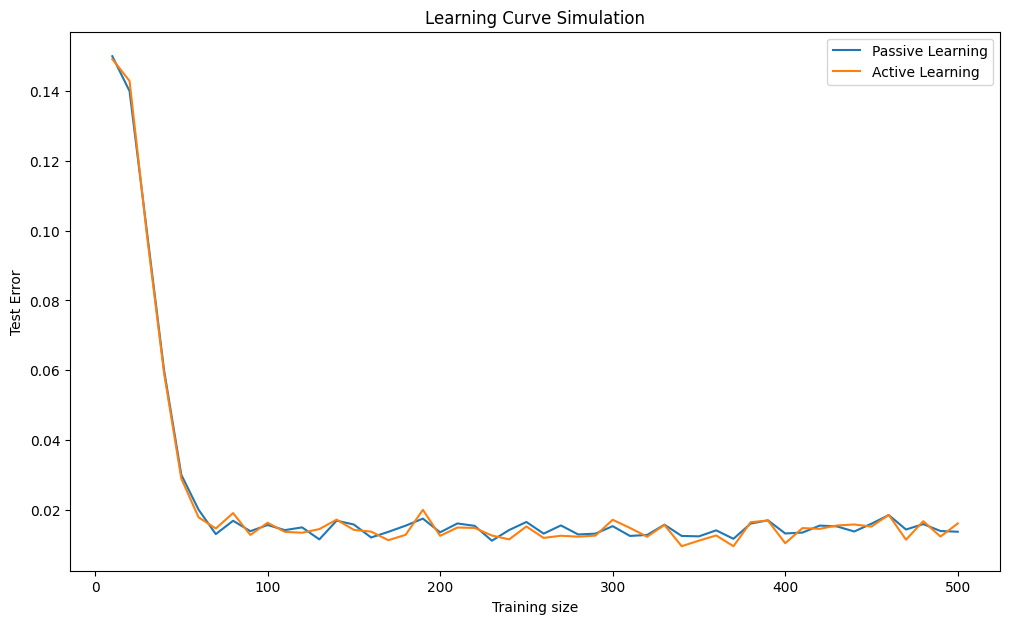

In [444]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.set_title(f"Learning Curve Simulation")
x = 10 * np.arange(1, 51)
axes.plot(x, passive_test_error, label='Passive Learning')
axes.plot(x, active_test_error, label='Active Learning')
axes.set_xlabel("Training size")
axes.set_ylabel("Test Error")
axes.legend()
plt.show()